In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import maboss

In [3]:
outputs = ['Apoptosis', 'Invasion']

### We simulate the Notch++ p53-- mutation for the invasion model

In [4]:
simulation = maboss.Ensemble(
    path="Invasion",
    use_physrandgen=0, 
    sample_count=100000,
    thread_count=6,
    istate={
        'DNAdamage': (0.5, 0.5),
        'ECMicroenv': (0.5, 0.5),
    },
    max_time=50, time_tick=1,
    outputs=outputs,
    mutations={"NICD": "ON", "p53": "OFF"},
    individual_results=True,
    random_sampling=True
)

result = simulation.run()

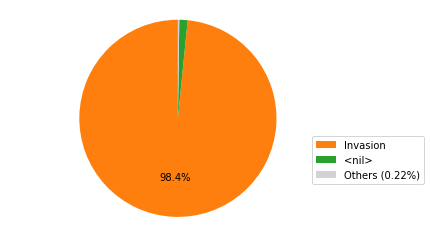

In [5]:
result.plot_piechart()

In [7]:
result.filterEnsembleByCondition("FilteredInvasion", "Invasion < 1.0")

In [14]:
simulation_sub = maboss.Ensemble(
    path="FilteredInvasion",
    use_physrandgen=0, 
    sample_count=100000,
    thread_count=6,
    istate={
        'DNAdamage': (0.5, 0.5),
        'ECMicroenv': (0.5, 0.5),
    },
    max_time=50, time_tick=1,
    outputs=outputs,
    mutations={"NICD": "ON", "p53": "OFF"},
    individual_results=True,
    random_sampling=True
)
simulation_sub.palette = simulation.palette
result_sub = simulation_sub.run()

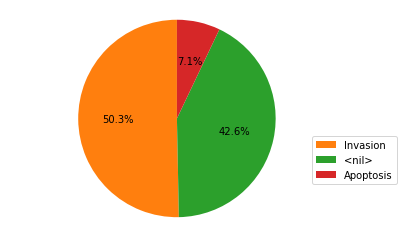

In [15]:
result_sub.plot_piechart()

### We compare it to the wild type

In [16]:
simulation_wt = maboss.Ensemble(
    path="Invasion",
    use_physrandgen=0, 
    sample_count=100000,
    thread_count=6,
    istate={
        'DNAdamage': (0.5, 0.5),
        'ECMicroenv': (0.5, 0.5),
    },
    max_time=50, time_tick=1,
    outputs=outputs,
    individual_results=True,
    random_sampling=True
)
simulation_wt.palette = simulation.palette
result_wt = simulation_wt.run()

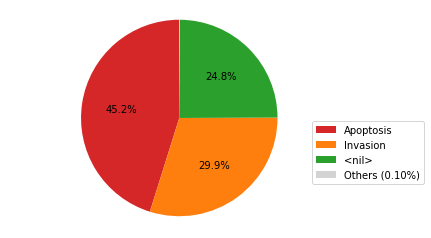

In [17]:
result_wt.plot_piechart()